# Data Exploration

In [1]:
# # Create a test set not for training, but at least for having an idea what to expect of my algorithm
# # If it is able to generalize or not.

# import nltk
# from nltk.corpus import words
# import csv

# DATASETPATH = "/home/zosov/workspace/jobs/trexquant/character-bert/data/words_250000_train.txt"

# def load_csv_as_strings(file_path):
#     with open(file_path, newline='') as csvfile:
#         reader = csv.reader(csvfile)
#         lines = [''.join(row) for row in reader]
#     return lines

# words_list = load_csv_as_strings(DATASETPATH)

# # Download the words corpus if not already present
# nltk.download('words')

# # Get the list of all English words
# all_english_words = set(words.words())

# # Exclude the words present in the provided file
# new_words_set = all_english_words - set(words_list)

# # Convert the set to a list and ensure it contains 250,000 words
# new_words_list = list(new_words_set)[:250000]

# # Check the number of words in the new list
# len(new_words_list)

# # Save the new list of words to a file
# # with open('words_130438_test.txt', 'w') as f:
# #     for word in new_words_list:
# #         # Lowercase the word and write it to the file
# #         f.write(word.lower() + '\n')

In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt


# Load the dataset consider all types string
DATASETPATH = "/home/zosov/workspace/jobs/trexquant/character-bert/data/words_250000_train.txt"
TEST_DATASETPATH = "/home/zosov/workspace/jobs/trexquant/character-bert/data/words_130438_test.txt"

def load_dataset(file_path):
    def load_csv_as_strings(file_path):
        with open(file_path, newline='') as csvfile:
            reader = csv.reader(csvfile)
            lines = [''.join(row) for row in reader]
        return lines

    lines = load_csv_as_strings(file_path)

    df = pd.DataFrame(lines, columns=["word"], dtype=str)

    # Get the length of each word
    df["word_length"] = df["word"].apply(len)

    # Get the unique characters in each word
    df["unique_chars"] = df["word"].apply(lambda x: len(set(x)))

    return df

# Split randomly df into train and validation sets (85% train, 15% validation)
def split_train_val(df, train_size=0.85):
    # Randomly shuffle the dataset
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Split the dataset into train and validation sets
    train_df = df.iloc[:int(train_size * len(df))]
    val_df = df.iloc[int(train_size * len(df)):]

    return train_df, val_df

# Load the dataset
df = load_dataset(DATASETPATH)
df_train, df_val = split_train_val(df,  train_size=0.85)
df_test = load_dataset(TEST_DATASETPATH)

# Set all the words to lower case
df_test['word'] = df_test['word'].str.lower()

# Remove words without alpha characters
df_test = df_test[df_test['word'].str.isalpha()]

# Number of words
num_words = len(df)
print(f"Total number of words: {num_words}")

# Descriptive statistics
print(df['word_length'].describe())

# Descriptive statistics
print(df['unique_chars'].describe())

df_test



Total number of words: 227300
count    227300.000000
mean          9.347761
std           2.981242
min           1.000000
25%           7.000000
50%           9.000000
75%          11.000000
max          29.000000
Name: word_length, dtype: float64
count    227300.000000
mean          7.396432
std           1.988945
min           1.000000
25%           6.000000
50%           7.000000
75%           9.000000
max          16.000000
Name: unique_chars, dtype: float64


,word,word_length,unique_chars
0,gnomed,6,6
1,contact,7,5
2,straffordian,12,9
3,sundayish,9,8
4,misadjust,9,8
...,...,...,...
130433,sphaerolitic,12,11
130434,breezy,6,5
130435,azoturia,8,7
130436,progressor,10,6


In [3]:
# Check for duplicates
duplicate_words = df[df.duplicated()]
print(f"Number of duplicate words: {len(duplicate_words)}")

# Remove duplicates
df = df.drop_duplicates()

# Check for non-alphabetic characters
non_alpha_words = df[df['word'].str.contains(r'[^a-zA-Z]')]
print(f"Number of words with non-alphabetic characters: {len(non_alpha_words)}")

# Remove non-alphabetic words
df = df[df['word'].str.isalpha()]

# Convert all words to lowercase
df['word'] = df['word'].str.lower()

Number of duplicate words: 0
Number of words with non-alphabetic characters: 0


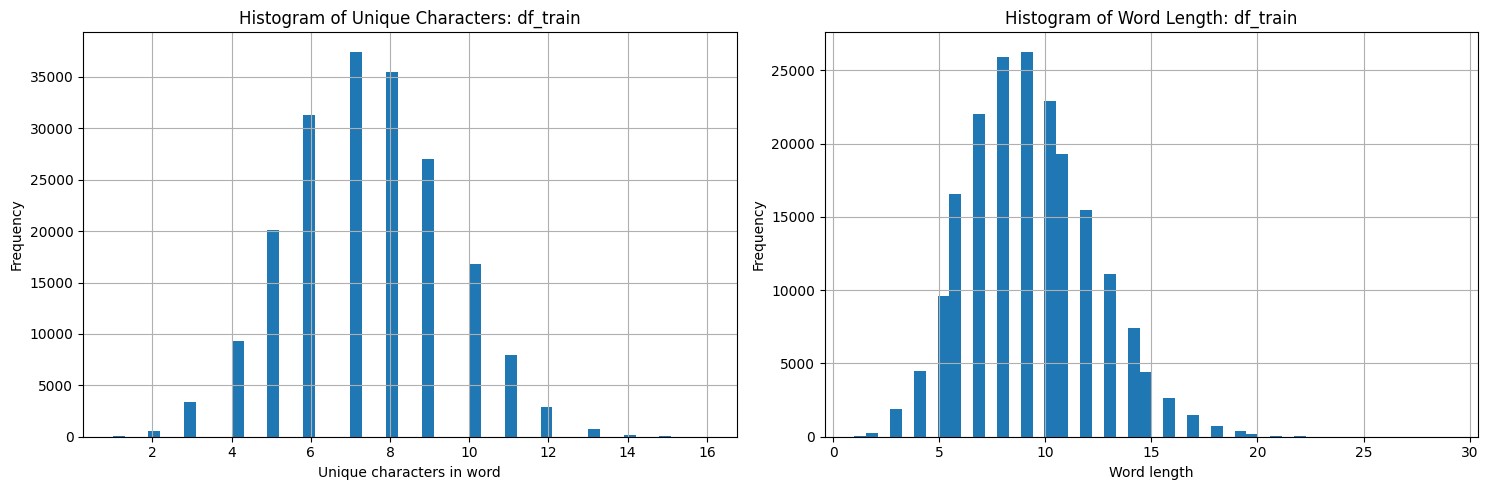

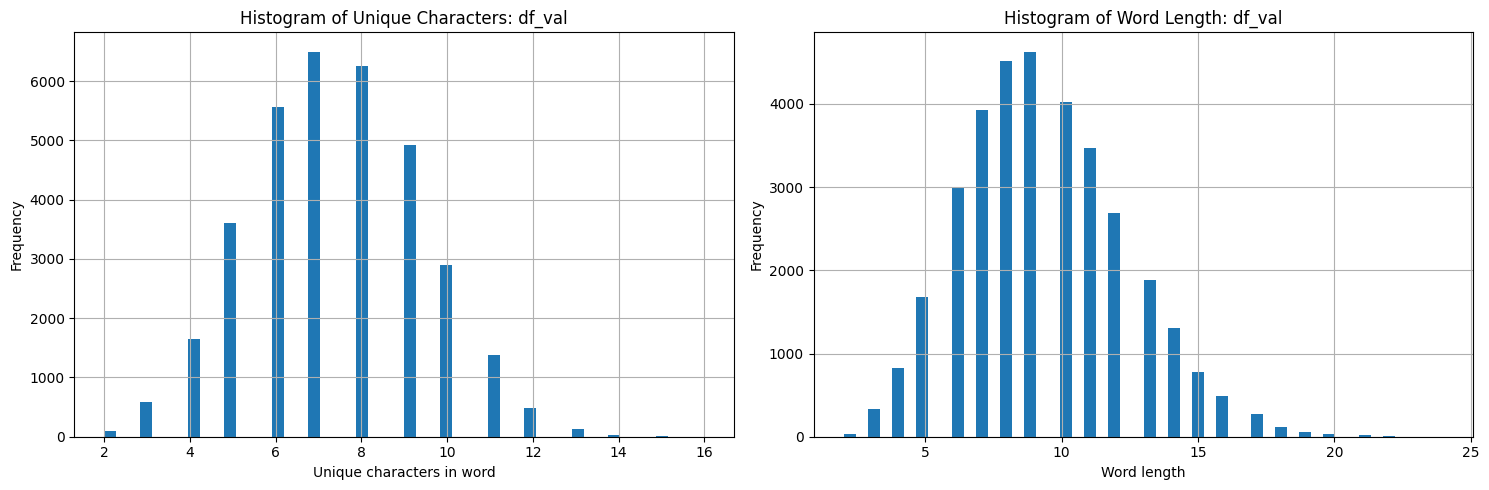

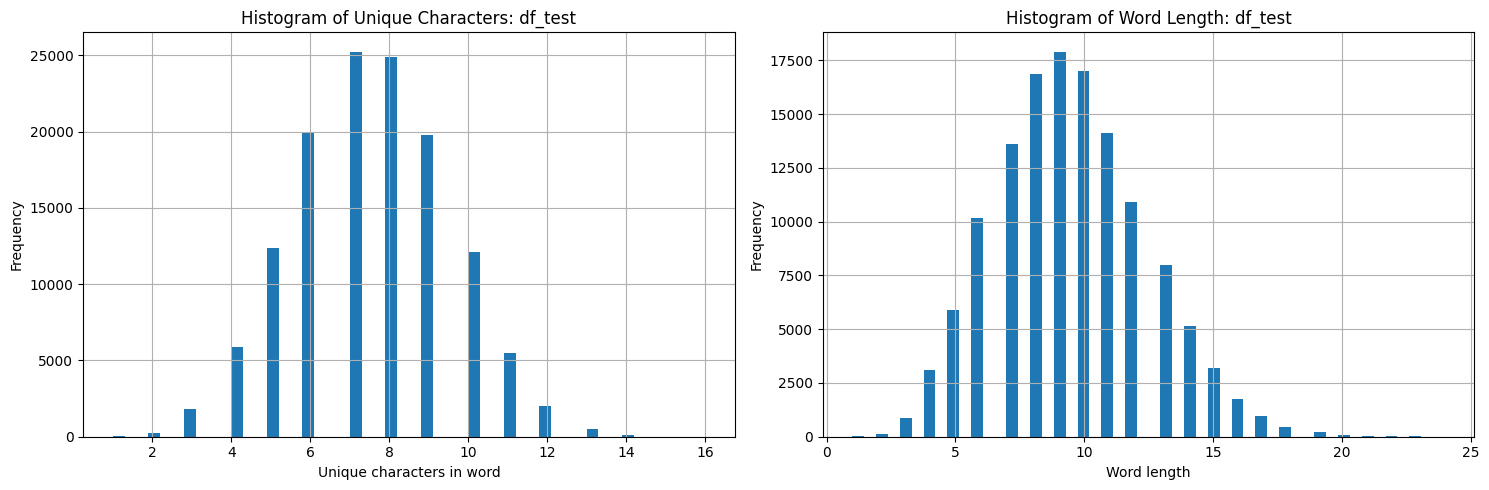

In [4]:

def plot_histograms(df, title = "df_train"):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))

    # Plot the first histogram for unique_chars
    df["unique_chars"].hist(bins=50, ax=axs[0])
    axs[0].set_xlabel('Unique characters in word')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title(f'Histogram of Unique Characters: {title}')

    # Plot the second histogram for word_length
    df["word_length"].hist(bins=50, ax=axs[1])
    axs[1].set_xlabel('Word length')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Word Length: {title}')

    plt.tight_layout()
    plt.show()

plot_histograms(df_train, title = "df_train")

plot_histograms(df_val, title = "df_val")

plot_histograms(df_test, title = "df_test")

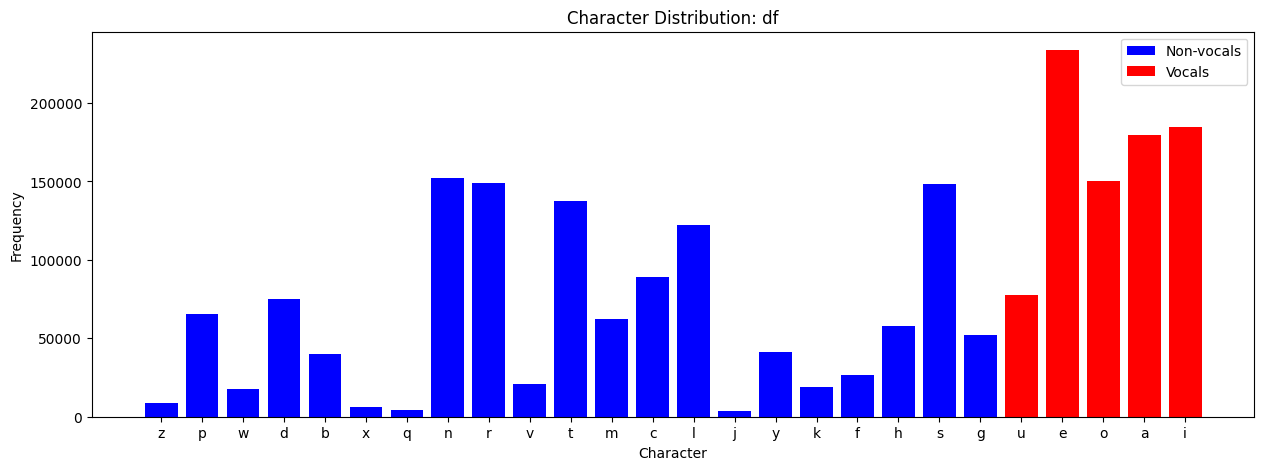

In [5]:
import matplotlib.pyplot as plt

def plot_char_distribution(df, title="df_train"):
    # Get the unique characters in the dataset
    unique_chars = set(''.join(df["word"]))
    char_freq = {char: 0 for char in unique_chars}

    # Count the frequency of each character
    for word in df["word"]:
        for char in word:
            char_freq[char] += 1

    # Define the vocals
    vocals = set('aeiou')

    # Separate the characters and frequencies into vocals and non-vocals
    vocal_chars = [char for char in char_freq.keys() if char in vocals]
    vocal_freqs = [char_freq[char] for char in vocal_chars]
    non_vocal_chars = [char for char in char_freq.keys() if char not in vocals]
    non_vocal_freqs = [char_freq[char] for char in non_vocal_chars]

    # Plot the character distribution
    plt.figure(figsize=(15, 5))
    plt.bar(non_vocal_chars, non_vocal_freqs, color='b', label='Non-vocals')
    plt.bar(vocal_chars, vocal_freqs, color='r', label='Vocals')
    plt.xlabel('Character')
    plt.ylabel('Frequency')
    plt.title(f'Character Distribution: {title}')
    plt.legend()
    plt.show()

plot_char_distribution(df, title="df")

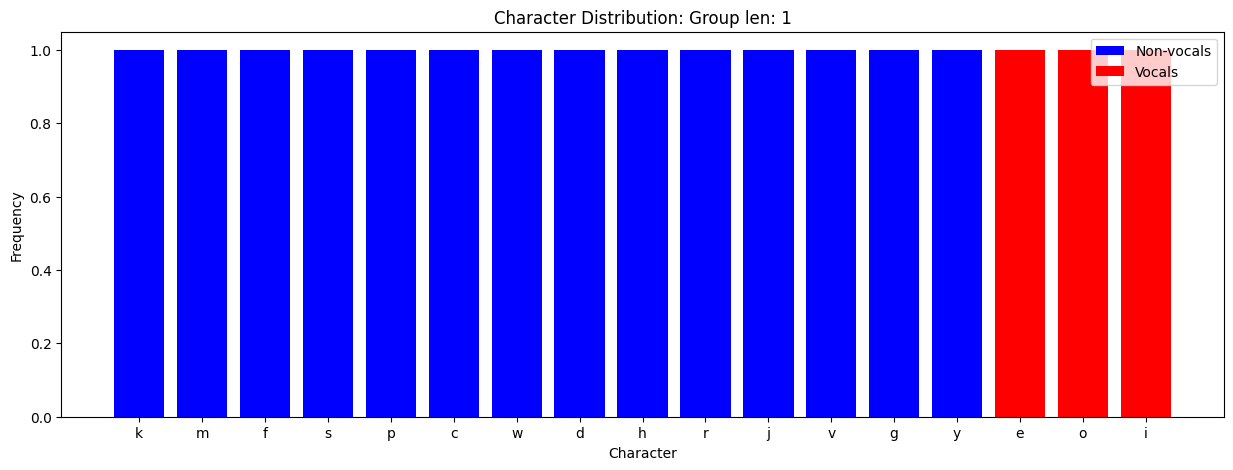

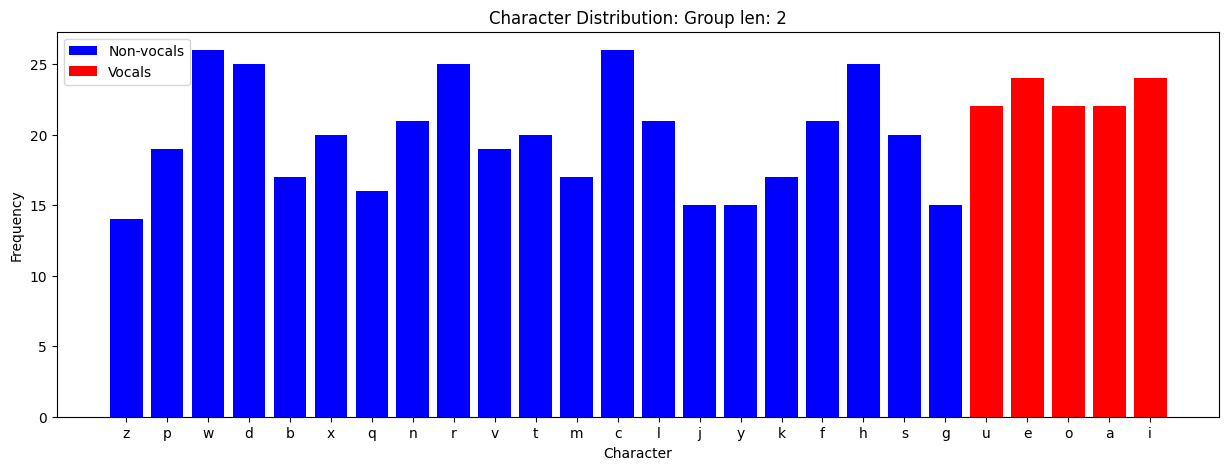

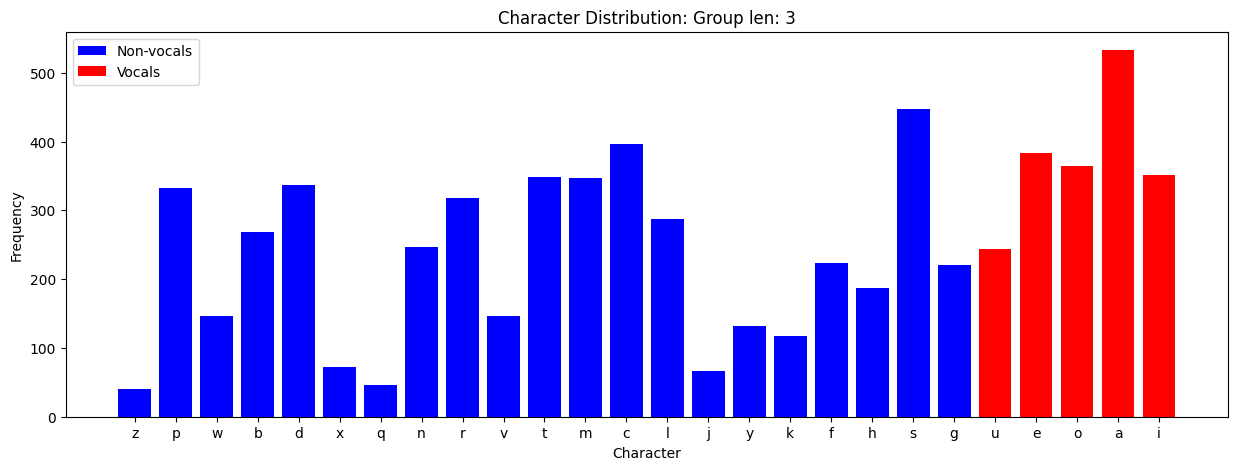

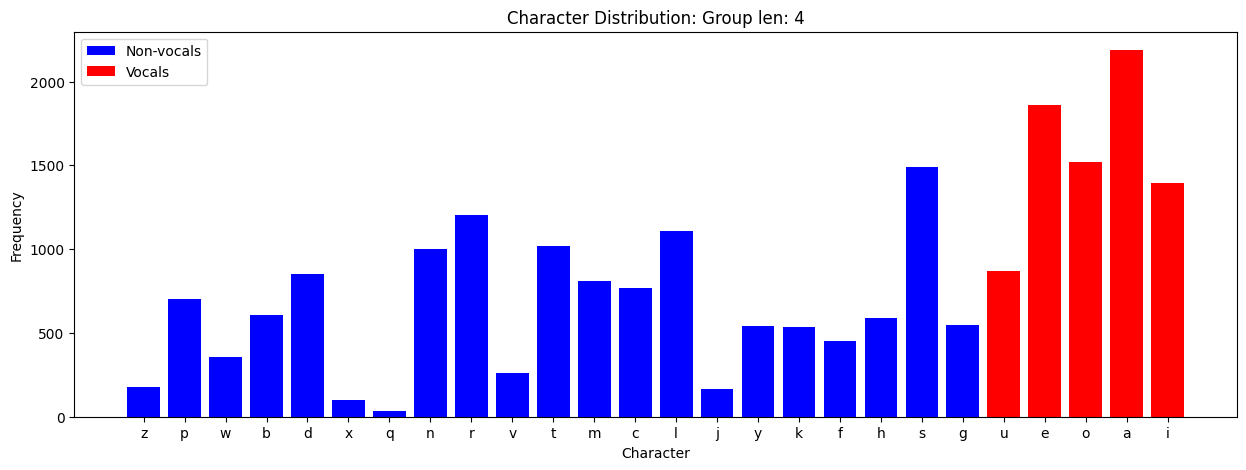

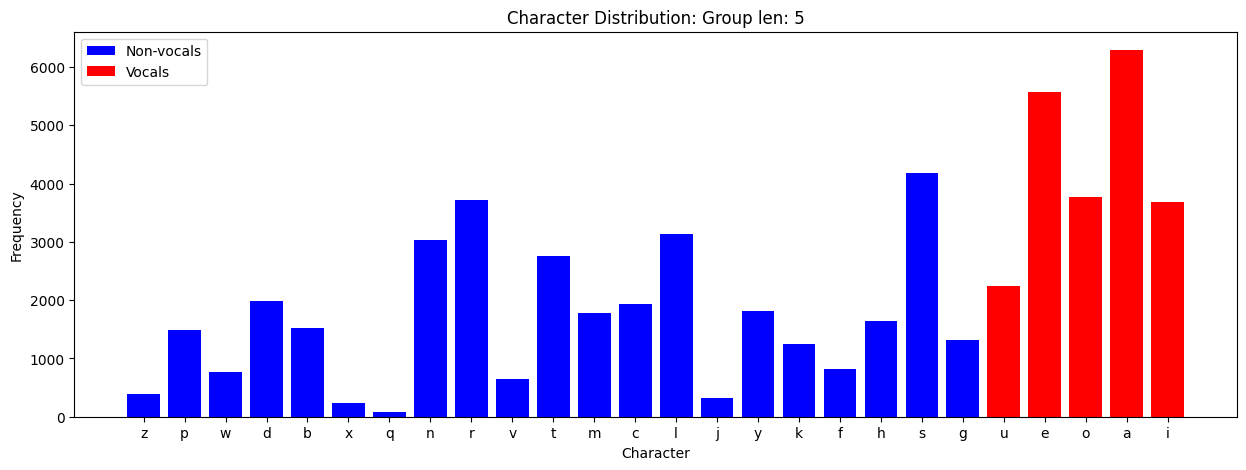

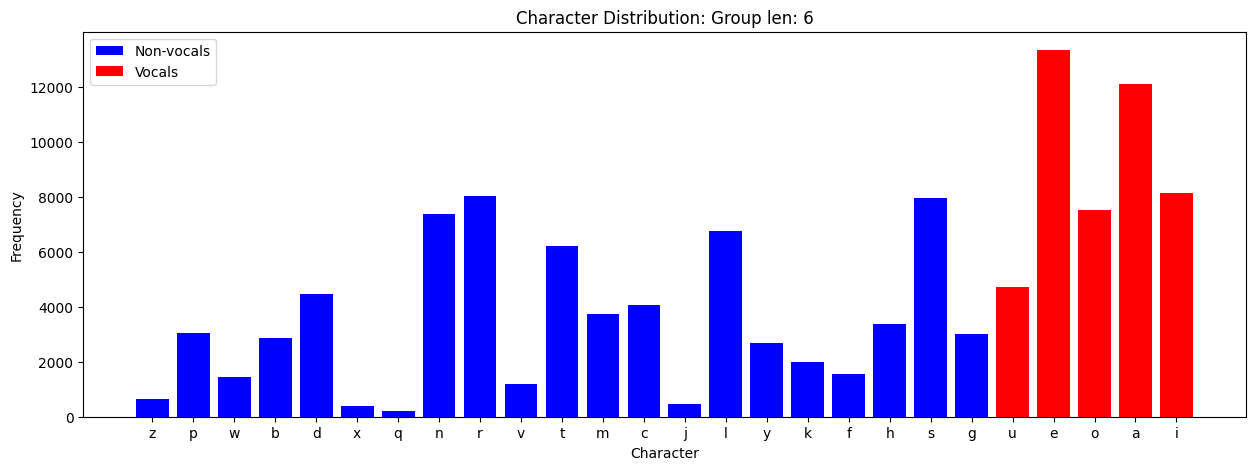

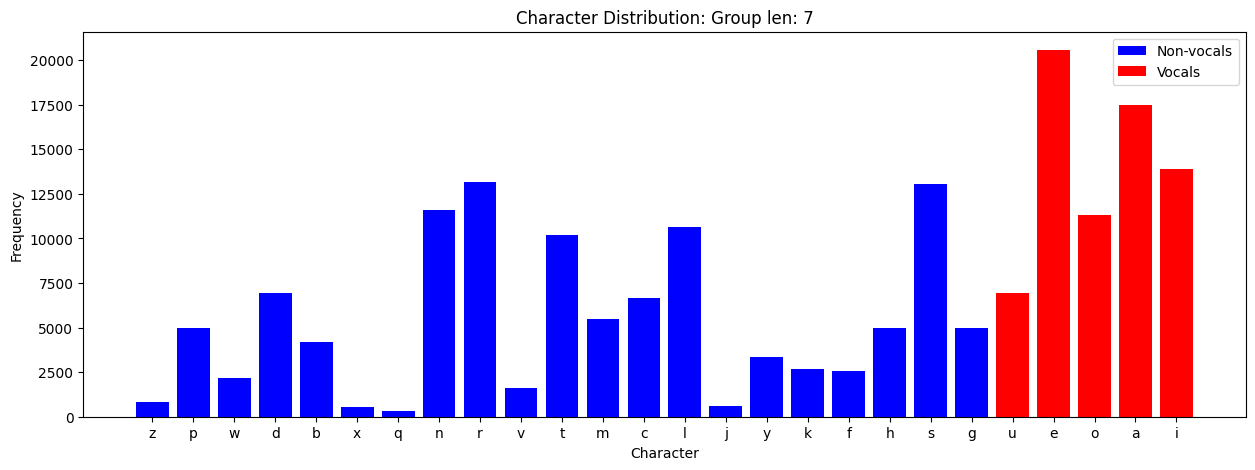

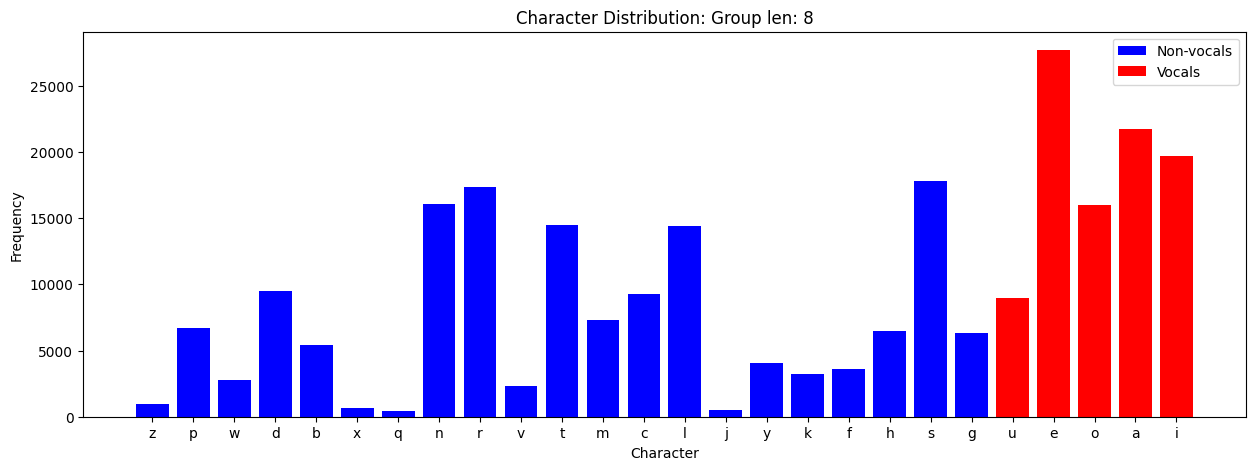

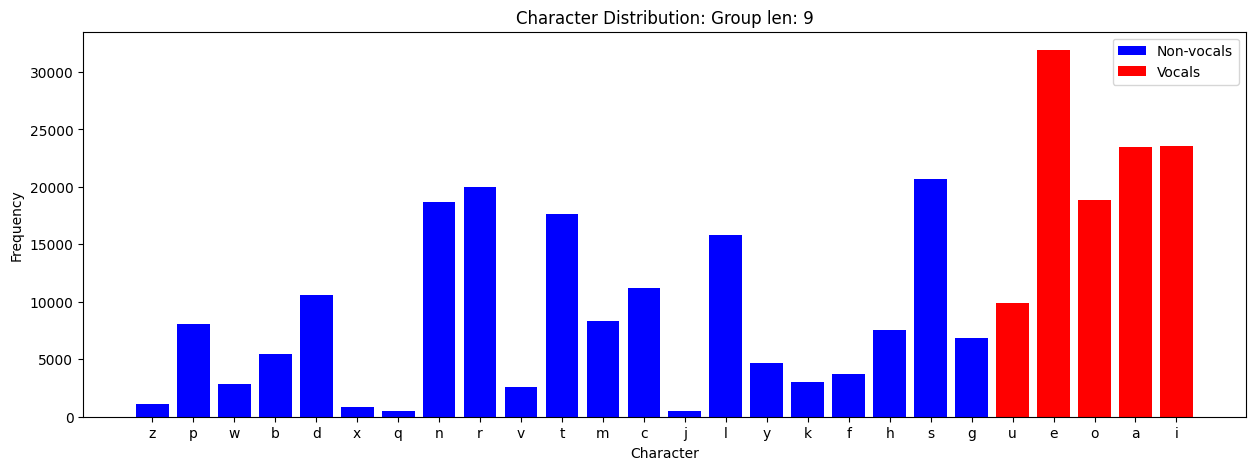

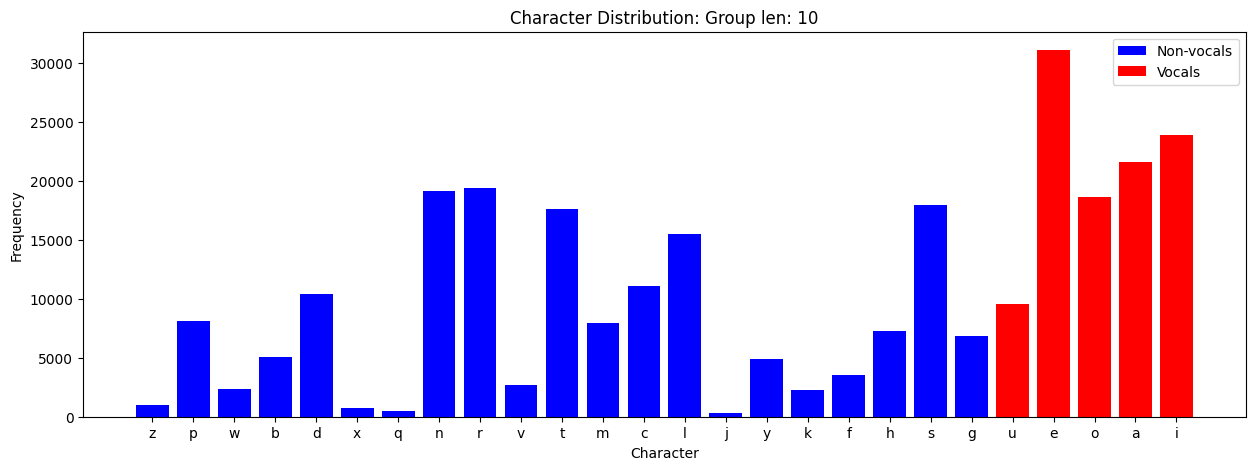

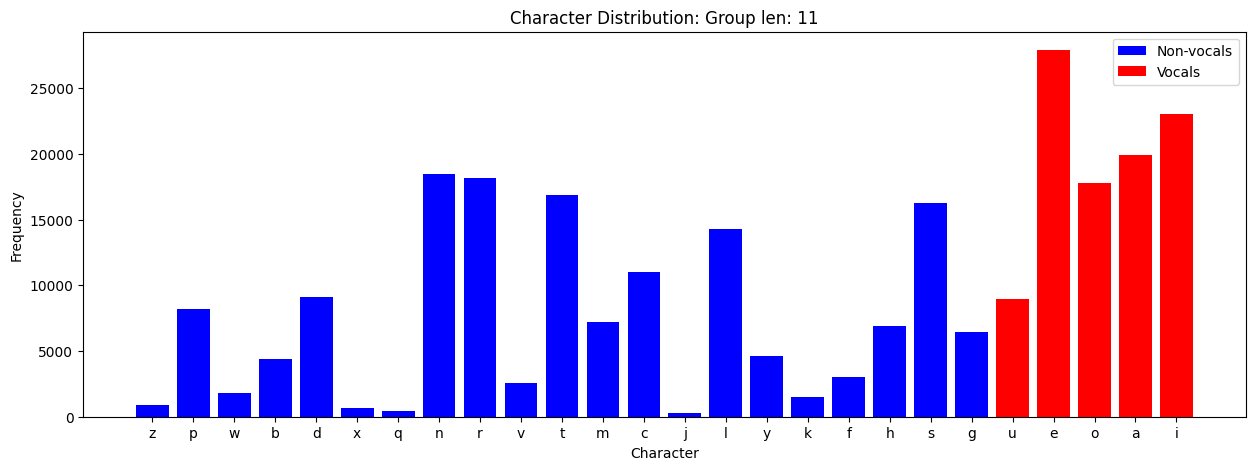

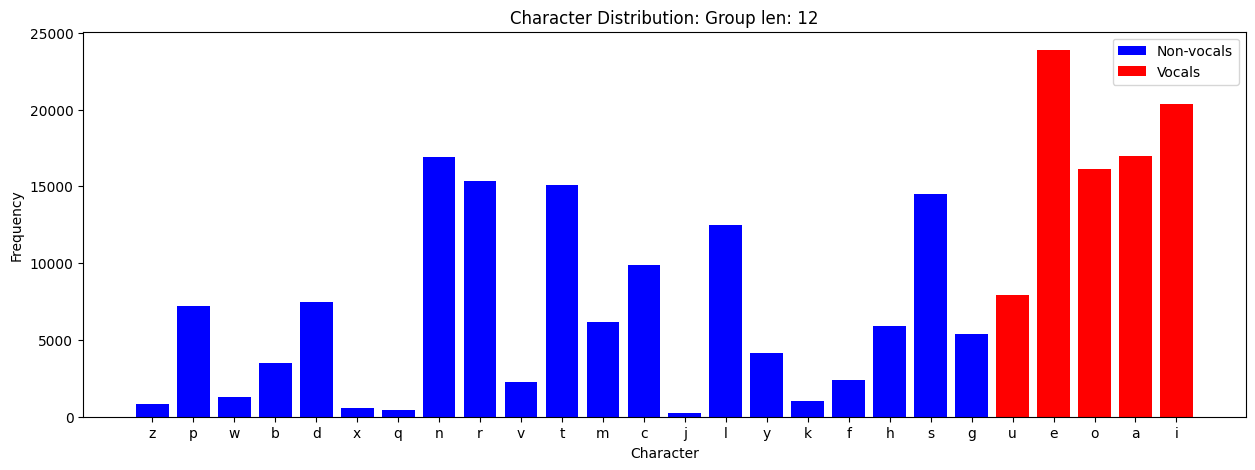

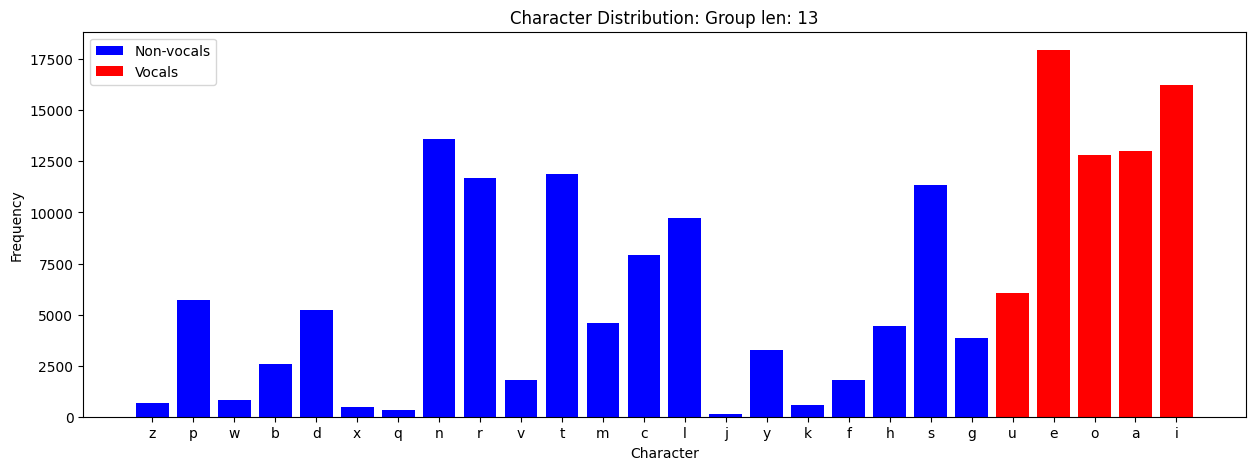

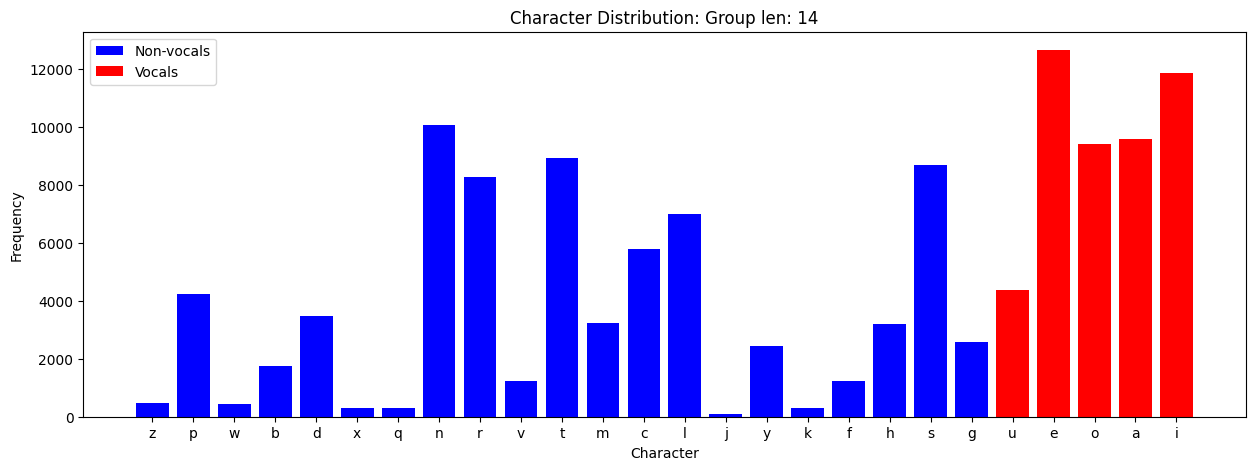

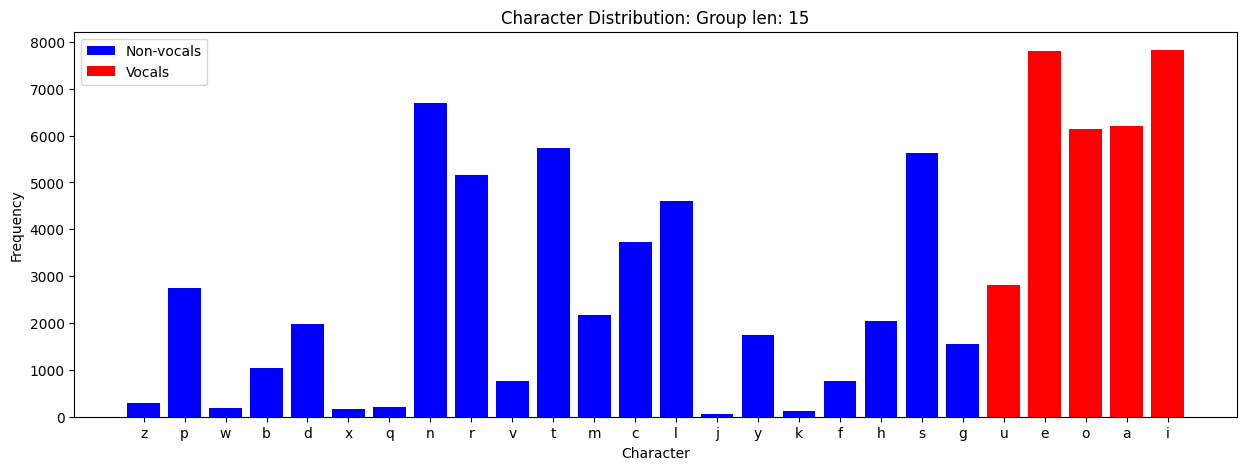

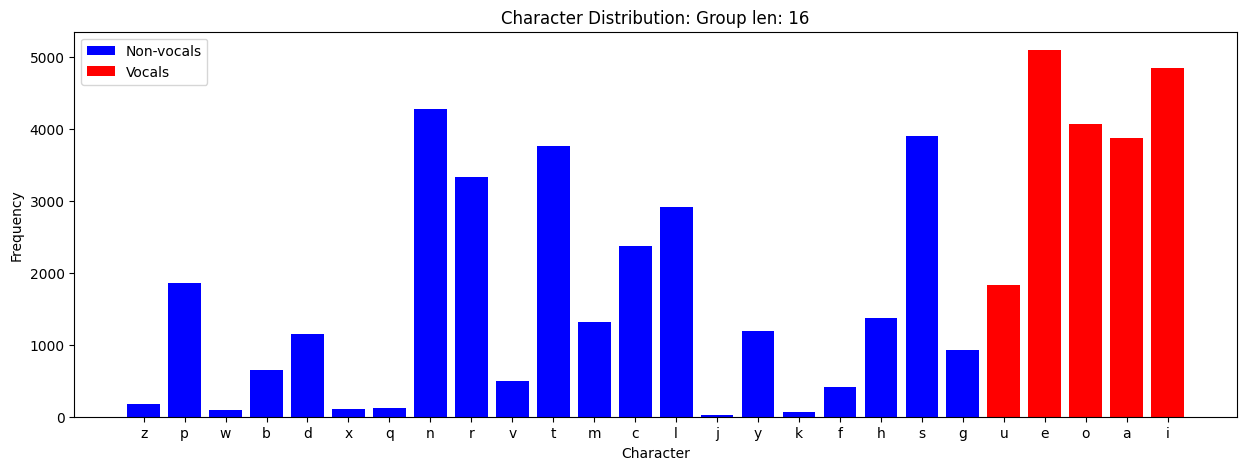

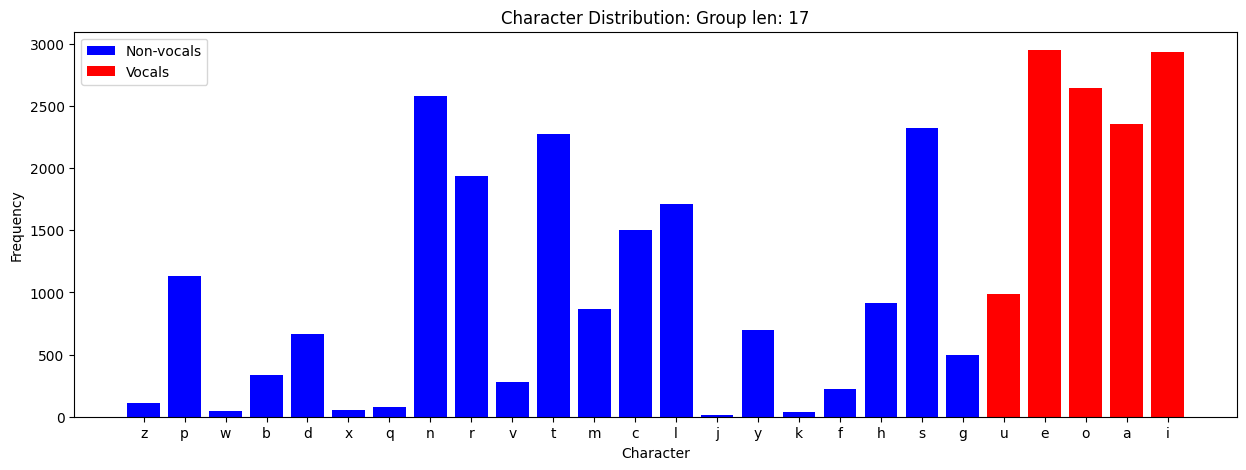

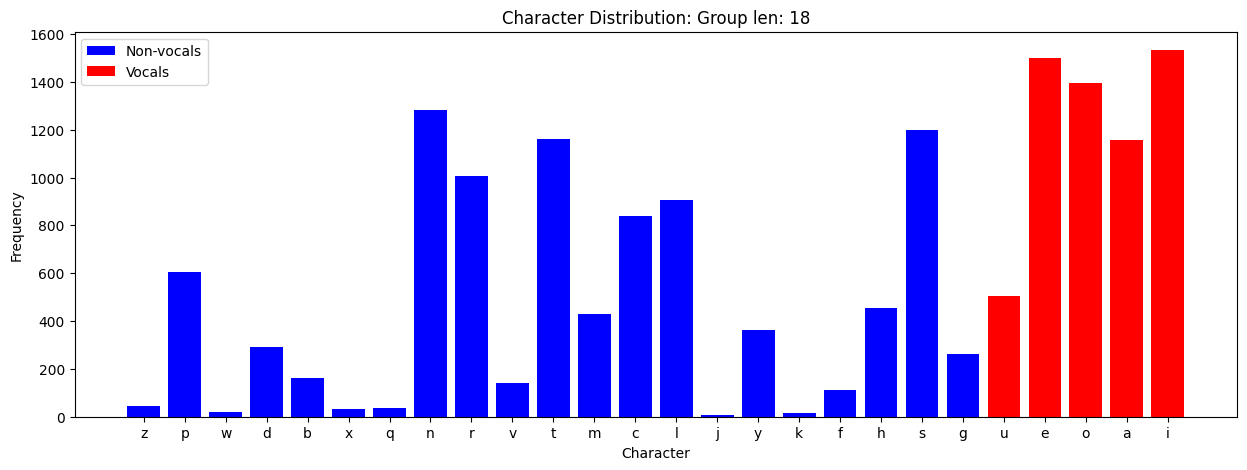

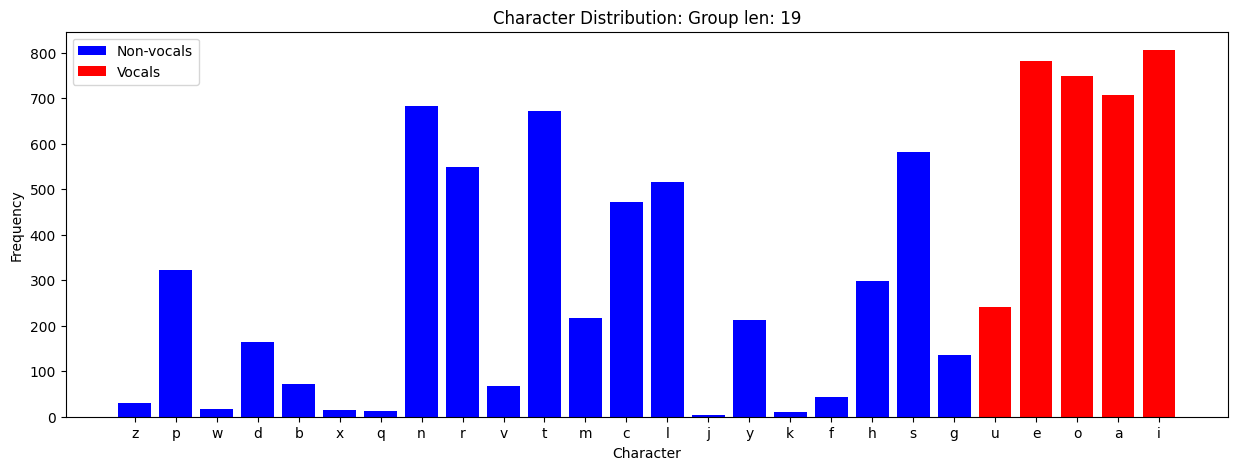

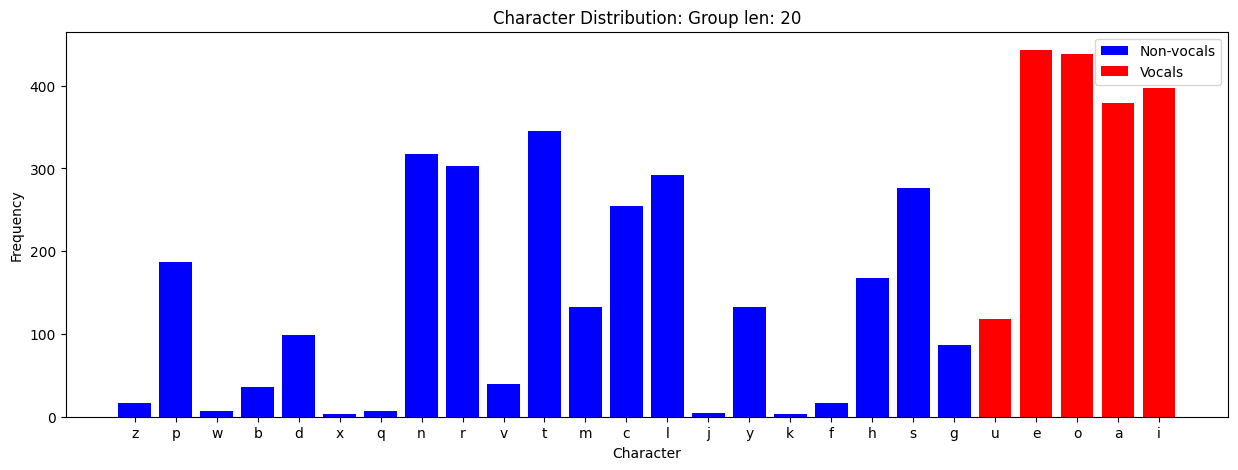

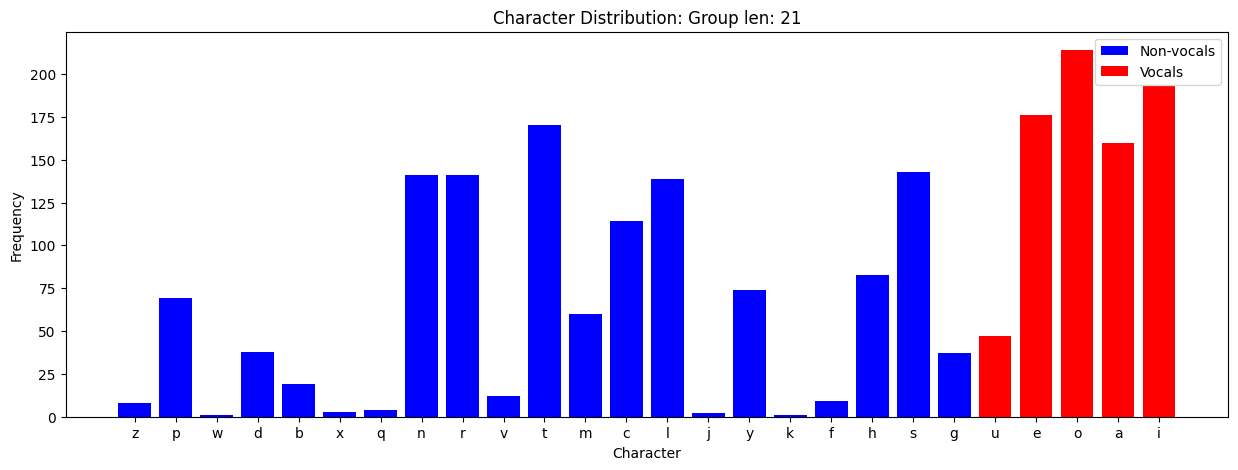

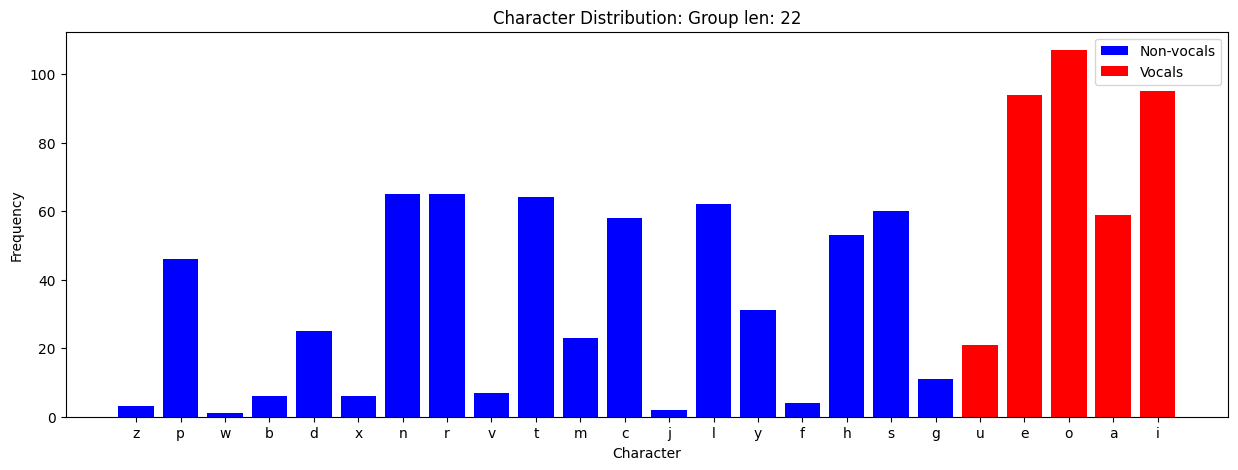

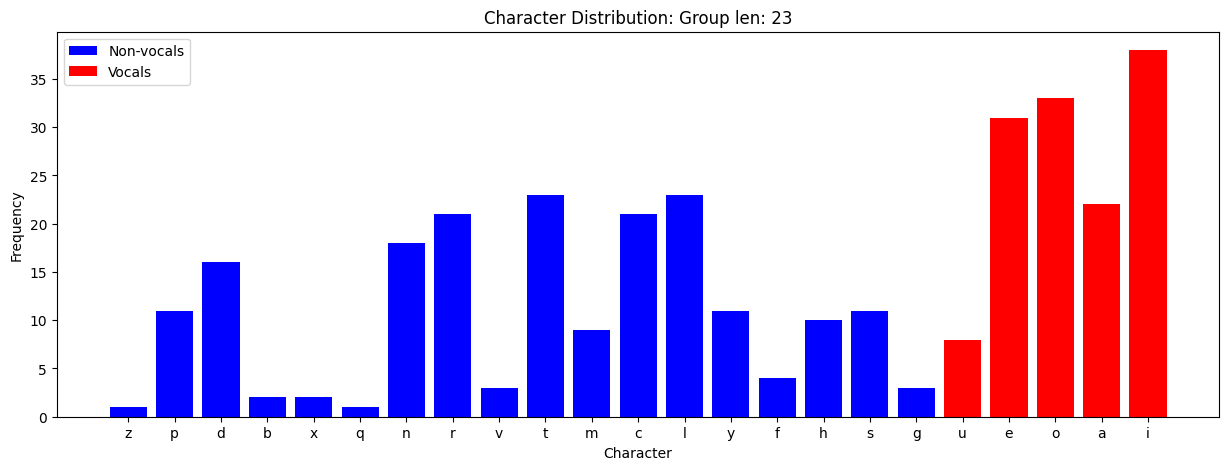

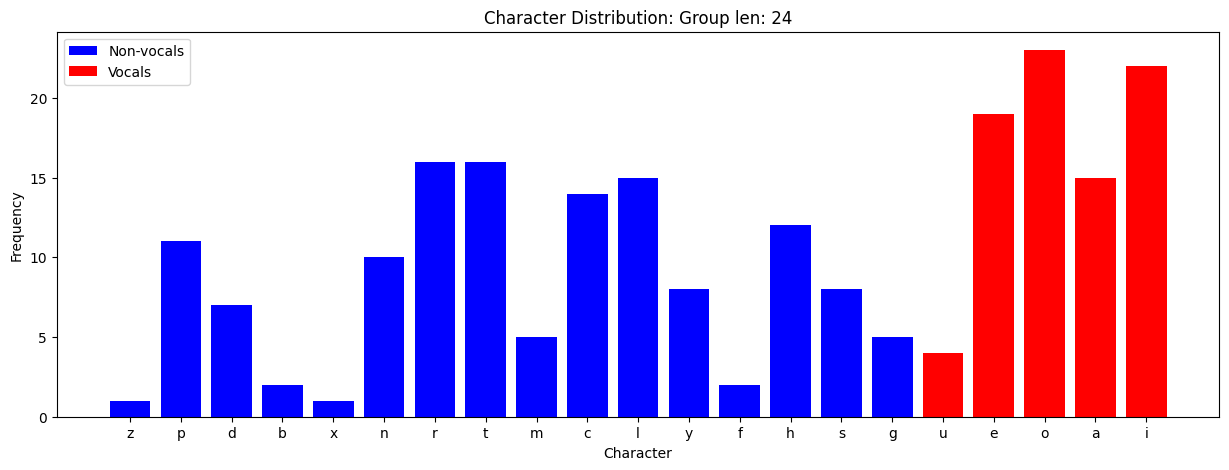

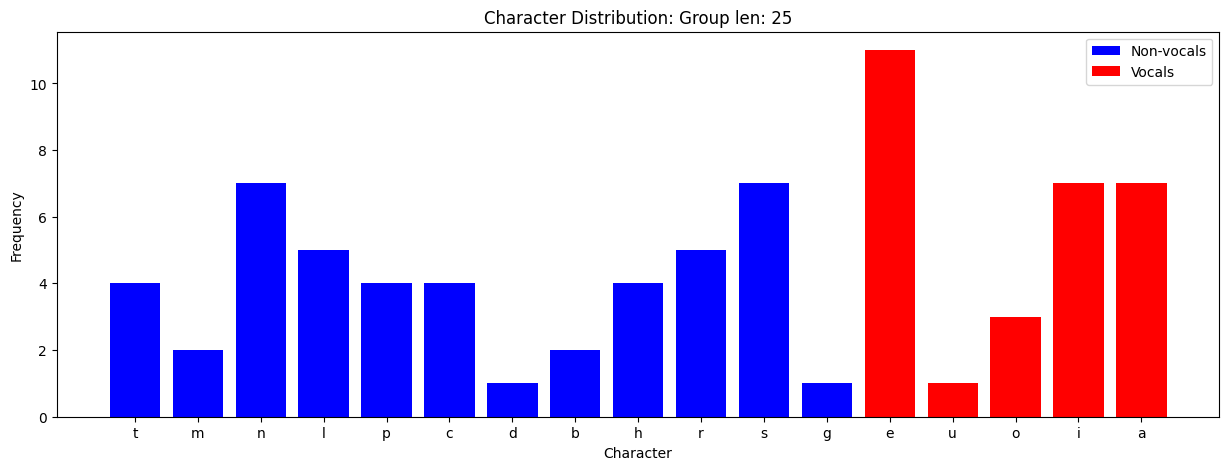

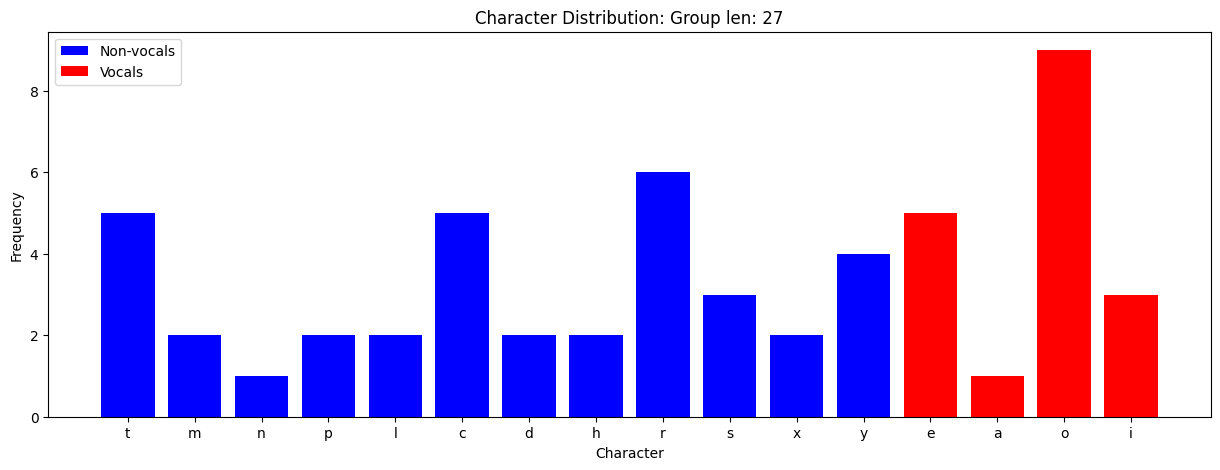

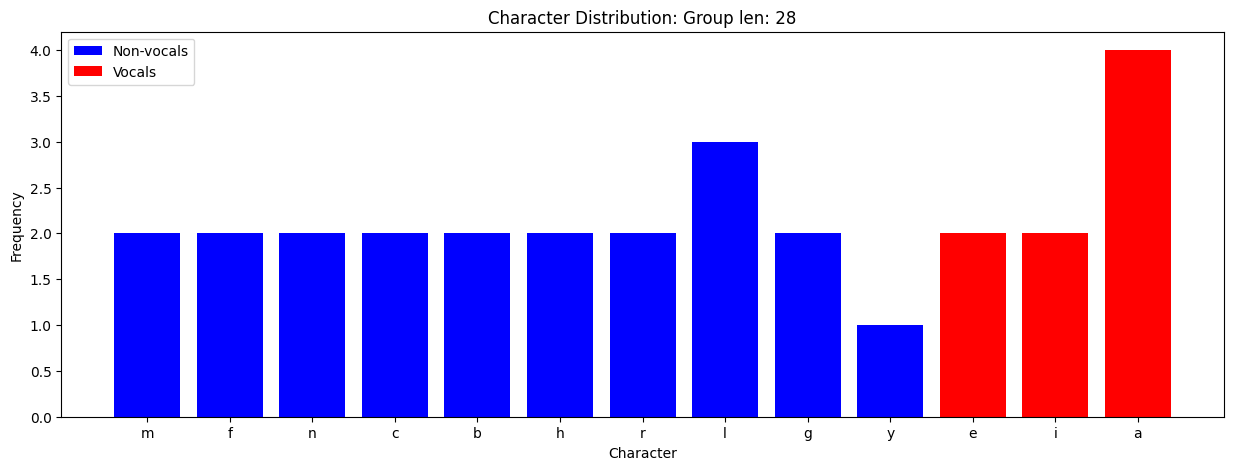

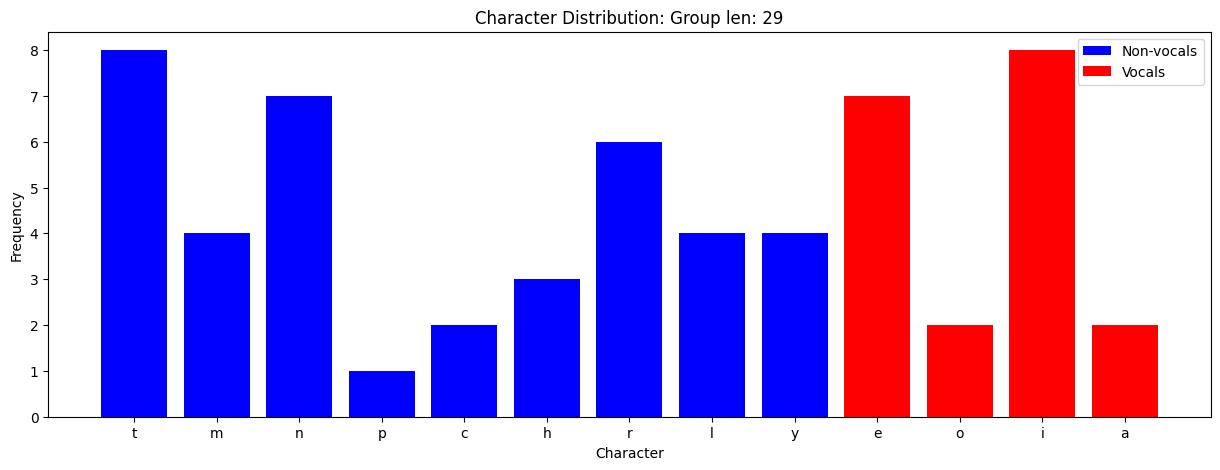

In [7]:
# Get groups of groups of words with the same length
def get_groups(df):
    groups = df.groupby("word_length")["word"].apply(list)
    return groups

# Get the groups of words with the same length
df_groups = get_groups(df)
# train_groups = get_groups(df_train)
# val_groups = get_groups(df_val)
# test_groups = get_groups(df_test)

# Plot the distribution of character per group
for group in df_groups:
    plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Group len: {len(group[0])}")

# for group in train_groups:
#     plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Train Group len: {len(group[0])}")

# for group in val_groups:
#     plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Val Group len: {len(group[0])}")

# for group in test_groups:
#     plot_char_distribution(pd.DataFrame(group, columns=["word"]), title=f"Test Group len: {len(group[0])}")


In [14]:
# Get the relative frequency of each character
def get_char_freq(df):
    # Get the unique characters in the dataset
    unique_chars = set(''.join(df["word"]))
    char_freq = {char: 0 for char in unique_chars}

    # Count the frequency of each character
    for word in df["word"]:
        for char in word:
            char_freq[char] += 1

    # Get the total number of characters
    total_chars = sum(char_freq.values())

    # Set a dictionary with letter from a to x and their relative frequencies to zero
    char_rel_freq = {chr(i + ord('a')): 0 for i in range(26)}

    for char, freq in char_freq.items():
        # Get the index from 0 to 26 from char
        char_rel_freq[char] = freq / total_chars

    return char_rel_freq


# Group the words by length
df_groups = df.groupby("word_length")["word"].apply(list)

# Per each group, get the relative frequency of each character
char_rel_freqs = df_groups.apply(lambda group: get_char_freq(pd.DataFrame(group, columns=["word"])))


for group in df_groups:
    char_rel_freqs = get_char_freq(pd.DataFrame(group, columns=["word"]))
    # print(f"Group len: {len(group[0])}", char_rel_freqs)
    print(f"Group len: {len(group[0])}", list(char_rel_freqs.values()))

# TODO: Take each of these probabilities per len and add then to the datasets of train
# and validation.

# Quemar estas probabilidades en el modelo y ver si mejora la performance.
# como se la longitud de la palabras? mido los dos indices de inicio y fin. en el collator y tokenizer

# Mejor meterlo como un tensor fijo como parte del input del modelo
# Lo guardo en format csv y lo cargo en el modelo


Group len: 1 [0, 0, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0.058823529411764705, 0, 0.058823529411764705, 0, 0.058823529411764705, 0.058823529411764705, 0, 0.058823529411764705, 0.058823529411764705, 0, 0, 0.058823529411764705, 0.058823529411764705, 0, 0.058823529411764705, 0]
Group len: 2 [0.041666666666666664, 0.032196969696969696, 0.04924242424242424, 0.04734848484848485, 0.045454545454545456, 0.03977272727272727, 0.028409090909090908, 0.04734848484848485, 0.045454545454545456, 0.028409090909090908, 0.032196969696969696, 0.03977272727272727, 0.032196969696969696, 0.03977272727272727, 0.041666666666666664, 0.03598484848484849, 0.030303030303030304, 0.04734848484848485, 0.03787878787878788, 0.03787878787878788, 0.041666666666666664, 0.03598484848484849, 0.04924242424242424, 0.03787878787878788, 0.028409090909090908, 0.026515151515151516]
Group len: 3

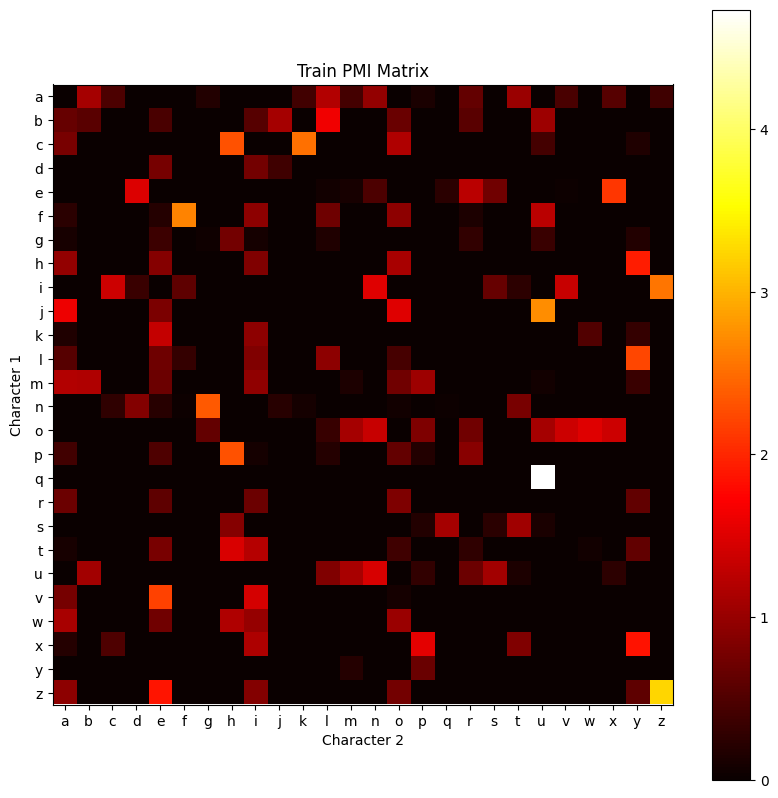

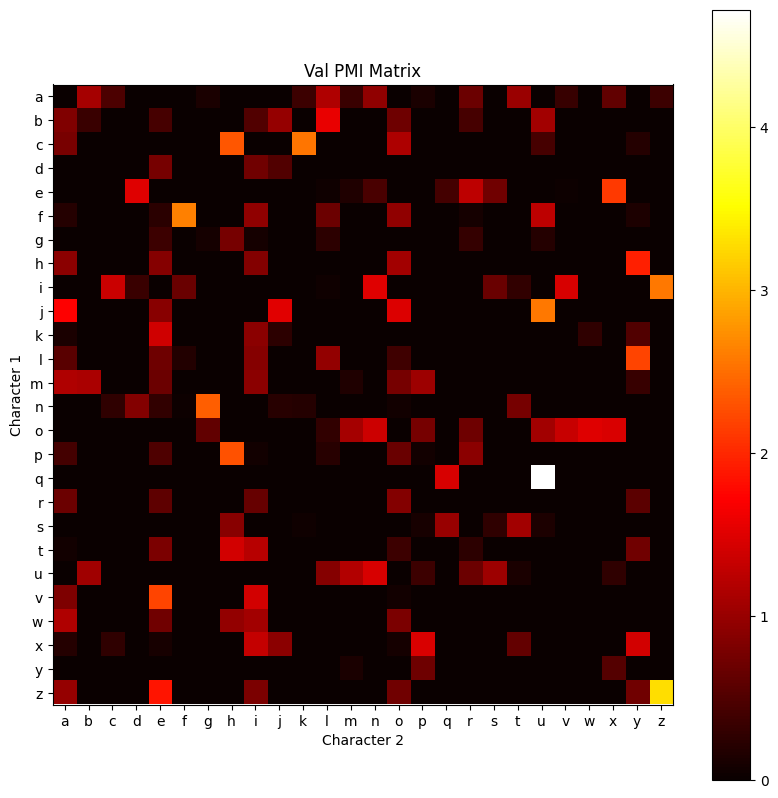

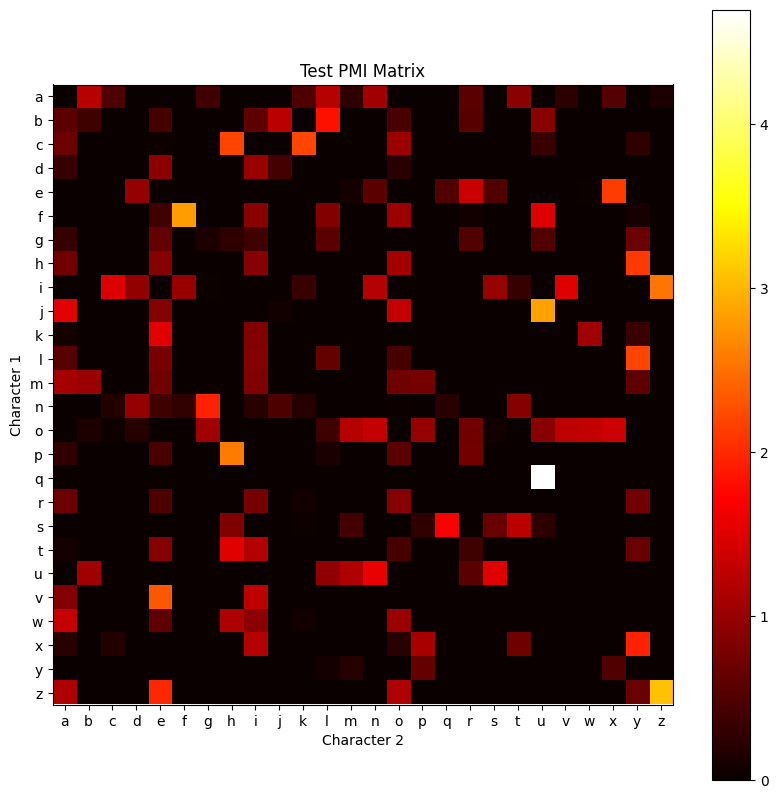

In [6]:
# Calculate the positive pointwise mutual information (PPMI) between characters
import numpy as np

def calculate_pmi(df, k=1):
    # Get the unique characters in the dataset
    unique_chars = set(''.join(df["word"]))
    char_freq = {char: 0 for char in unique_chars}

    # Count the frequency of each character
    for word in df["word"]:
        for char in word:
            char_freq[char] += 1

    # Calculate the total number of characters
    total_chars = sum(char_freq.values())

    # Calculate the probability of each character with k-smoothing
    char_prob = {char: (freq + k) / (total_chars + k * len(unique_chars)) for char, freq in char_freq.items()}

    # Calculate the probability of each pair of characters with k-smoothing
    char_pairs = [(char1, char2) for char1 in unique_chars for char2 in unique_chars]
    char_pair_prob = {pair: 0 for pair in char_pairs}
    for word in df["word"]:
        for i in range(len(word) - 1):
            char_pair_prob[(word[i], word[i + 1])] += 1
    char_pair_prob = {pair: (freq + k) / (total_chars + k * len(char_pairs)) for pair, freq in char_pair_prob.items()}

    # Calculate the pointwise mutual information (PMI) between characters
    char_pmi = {pair: max(np.log2(char_pair_prob[pair] / (char_prob[pair[0]] * char_prob[pair[1]])), 0) for pair in char_pairs}

    return char_pmi

# Plot the the matrix of PPMI values according each pair in trian_char_pmi
def plot_pmi_matrix(char_pmi, title="Train PMI Matrix"):
    # Get the unique characters
    unique_chars = sorted(set([char for pair in char_pmi.keys() for char in pair]))

    # Create a matrix of PPMI values
    pmi_matrix = np.zeros((len(unique_chars), len(unique_chars)))
    for i, char1 in enumerate(unique_chars):
        for j, char2 in enumerate(unique_chars):
            pmi_matrix[i, j] = char_pmi.get((char1, char2), 0)

    # Plot the matrix of PPMI values
    plt.figure(figsize=(10, 10))
    plt.imshow(pmi_matrix, cmap='hot', interpolation='nearest')
    plt.xticks(range(len(unique_chars)), unique_chars)
    plt.yticks(range(len(unique_chars)), unique_chars)
    plt.xlabel('Character 2')
    plt.ylabel('Character 1')
    plt.title(title)
    plt.colorbar()
    plt.show()

# Calculate the PMI for the training set
train_char_pmi = calculate_pmi(df_train)
plot_pmi_matrix(train_char_pmi, title="Train PMI Matrix")

# Calculate the PMI for the validation set
val_char_pmi = calculate_pmi(df_val)
plot_pmi_matrix(val_char_pmi, title="Val PMI Matrix")

# Calculate the PMI for the test set
test_char_pmi = calculate_pmi(df_test)
plot_pmi_matrix(test_char_pmi, title="Test PMI Matrix")


# Data Split

In [7]:
df = load_dataset(DATASETPATH)
df_train, df_val = split_train_val(df,  train_size=0.90)
df_test = load_dataset(TEST_DATASETPATH)

# Set all the words to lower case
df_test['word'] = df_test['word'].str.lower()

# Remove words without alpha characters
df_test = df_test[df_test['word'].str.isalpha()]

print("Train: ", len(df_train))
print("Val: ", len(df_val))
print("Test: ", len(df_test))

Train:  204570
Val:  22730
Test:  130436


In [8]:
# Emulate a mlm probability masking to create fixed validation and test sets

def mask_words(df, mask_prob=0.4, mask_token="_", random_state=42, random_prob = True):

    if random_prob:
        mask_prob = np.random.uniform(0.1, 0.7)
        print(f"Batch Mask probability: {mask_prob}")

    # Set the random seed
    np.random.seed(random_state)

    # Convert the words to lowercase
    words_batch = [word.lower() for word in df['word']]
    labels = words_batch.copy()

    # Mask the words
    masked_words = []
    previous_guesses = []
    for word in words_batch:    
        # Unique characters
        unique_chars = list(set(word))

        # Split the word into characters
        word_chars = list(word)

        # Mask a subset of the characters
        mask = np.random.rand(len(unique_chars)) < mask_prob

        # Unique characters to mask
        to_mask_tokens = [char for char, m in zip(unique_chars, mask) if m]
        
        # Mask the occurences of the masked_chars in the word
        for i, char in enumerate(word_chars):
            if char in to_mask_tokens:
                word_chars[i] = mask_token

        # NOTE: if after everything the word is the same, mask a random character
        if word == ''.join(word_chars):
            idx = np.random.randint(0, len(word_chars))

            # Mask also the occurence
            random_char = word_chars[idx]

            for i, char in enumerate(word_chars):
                if char == random_char:
                    word_chars[i] = mask_token

        # Join the masked characters back into a word
        masked_word = ''.join(word_chars)
        masked_words.append(masked_word)

        # Create a one-hot encoding for the masked characters
        prev_guess = [0] * 26
        for char in masked_word:
            if char != mask_token:
                prev_guess[ord(char) - ord('a')] = 1

        previous_guesses.append(prev_guess)

    df['masked_word'] = masked_words
    df['labels'] = labels
    df['previous_guesses'] = previous_guesses

    return df

# Mask words by batches
batch_size = 32
df_val['group'] = (df_val.index // batch_size) + 1
df_masked_val = df_val.groupby('group').apply(mask_words).reset_index(drop=True)
df_masked_val

Batch Mask probability: 0.4557137424207366
Batch Mask probability: 0.41204081270668647
Batch Mask probability: 0.33585863480005623
Batch Mask probability: 0.6799928914262017
Batch Mask probability: 0.20626640764422938
Batch Mask probability: 0.48728337754430073
Batch Mask probability: 0.48977973942832875
Batch Mask probability: 0.2901532030937666
Batch Mask probability: 0.6616928644964686
Batch Mask probability: 0.24639378602745016
Batch Mask probability: 0.23811116094493318
Batch Mask probability: 0.32209522015326664
Batch Mask probability: 0.2145466186902076
Batch Mask probability: 0.6436592726311323
Batch Mask probability: 0.6723571462015524
Batch Mask probability: 0.648918634132269
Batch Mask probability: 0.1145895798588723
Batch Mask probability: 0.44337548150250294
Batch Mask probability: 0.2072936255327973
Batch Mask probability: 0.20626640764422938
Batch Mask probability: 0.31004704461680543
Batch Mask probability: 0.31004704461680543
Batch Mask probability: 0.611805673280416
B

/tmp/ipykernel_299482/2937871100.py:69: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_masked_val = df_val.groupby('group').apply(mask_words).reset_index(drop=True)


,word,word_length,unique_chars,group,masked_word,labels,previous_guesses
0,heraclitus,10,10,6393,he__cl_t_s,heraclitus,"[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, ..."
1,merodach,8,8,6393,_e_od___,merodach,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,ingirt,6,5,6393,__g___,ingirt,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,shizuoka,8,8,6393,___zuoka,shizuoka,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ..."
4,multichannelled,15,11,6393,m__t____nne__ed,multichannelled,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
...,...,...,...,...,...,...,...
22725,myases,6,5,7103,m__s_s,myases,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."
22726,leipsic,7,6,7104,lei_si_,leipsic,"[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ..."
22727,osteoses,8,4,7104,o_teo_e_,osteoses,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
22728,pomary,6,6,7104,__m__y,pomary,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ..."


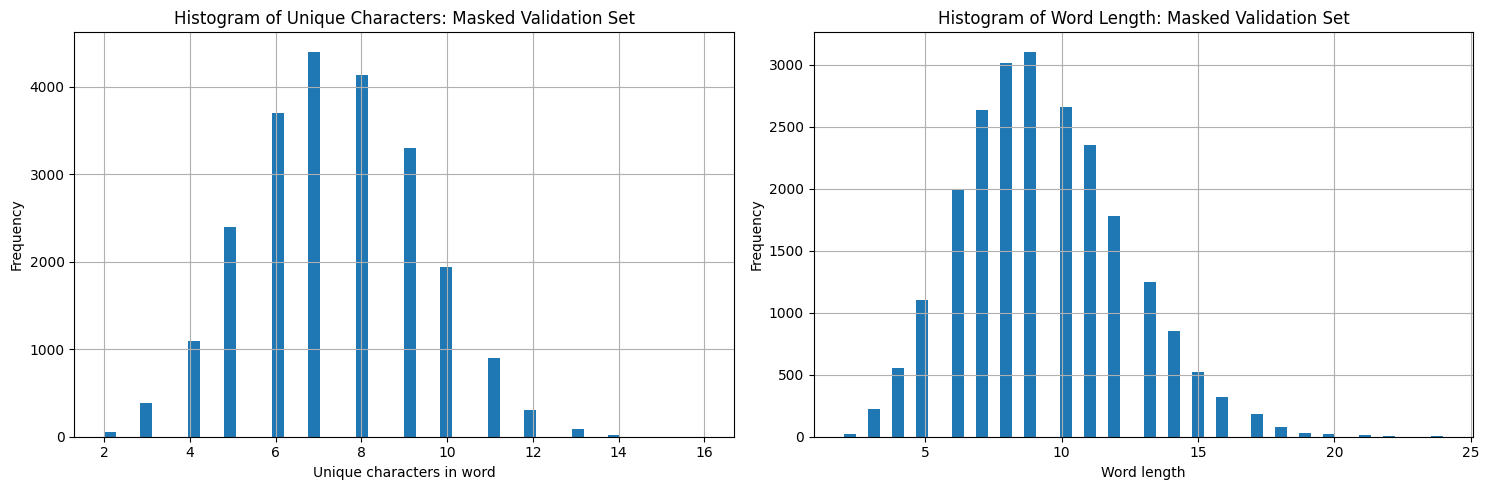

In [9]:
# Plot the distribution of unique characters in the masked validation set
plot_histograms(df_masked_val, title="Masked Validation Set")


In [10]:
# Mask words by batches
batch_size = 32
df_test['group'] = (df_test.index // batch_size) + 1
df_masked_test = df_test.groupby('group').apply(mask_words).reset_index(drop=True)
df_masked_test

Batch Mask probability: 0.31981710597621504
Batch Mask probability: 0.40158225586311525
Batch Mask probability: 0.2766693352417514
Batch Mask probability: 0.6799928914262017
Batch Mask probability: 0.2145466186902076
Batch Mask probability: 0.648918634132269
Batch Mask probability: 0.40158225586311525
Batch Mask probability: 0.2502770911633505
Batch Mask probability: 0.26846341746451347
Batch Mask probability: 0.442036702053619
Batch Mask probability: 0.46900433601950187
Batch Mask probability: 0.6569911375526352
Batch Mask probability: 0.2766693352417514
Batch Mask probability: 0.32209522015326664
Batch Mask probability: 0.6723571462015524
Batch Mask probability: 0.6781719862535517
Batch Mask probability: 0.32209522015326664
Batch Mask probability: 0.1562048606968555
Batch Mask probability: 0.5176178780049838
Batch Mask probability: 0.2766693352417514
Batch Mask probability: 0.26846341746451347
Batch Mask probability: 0.611805673280416
Batch Mask probability: 0.6838063328514673
Batch 

/tmp/ipykernel_299482/1659766850.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_masked_test = df_test.groupby('group').apply(mask_words).reset_index(drop=True)


,word,word_length,unique_chars,group,masked_word,labels,previous_guesses
0,gnomed,6,6,1,_n_med,gnomed,"[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ..."
1,contact,7,5,1,con__c_,contact,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
2,straffordian,12,9,1,s_ra__or__a_,straffordian,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,sundayish,9,8,1,s__d_yish,sundayish,"[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, ..."
4,misadjust,9,8,1,m__a_ju_t,misadjust,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ..."
...,...,...,...,...,...,...,...
130431,sphaerolitic,12,11,4077,sp_a_roliti_,sphaerolitic,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, ..."
130432,breezy,6,5,4077,b_eezy,breezy,"[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
130433,azoturia,8,7,4077,azo__ria,azoturia,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ..."
130434,progressor,10,6,4077,_rogr_ssor,progressor,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, ..."


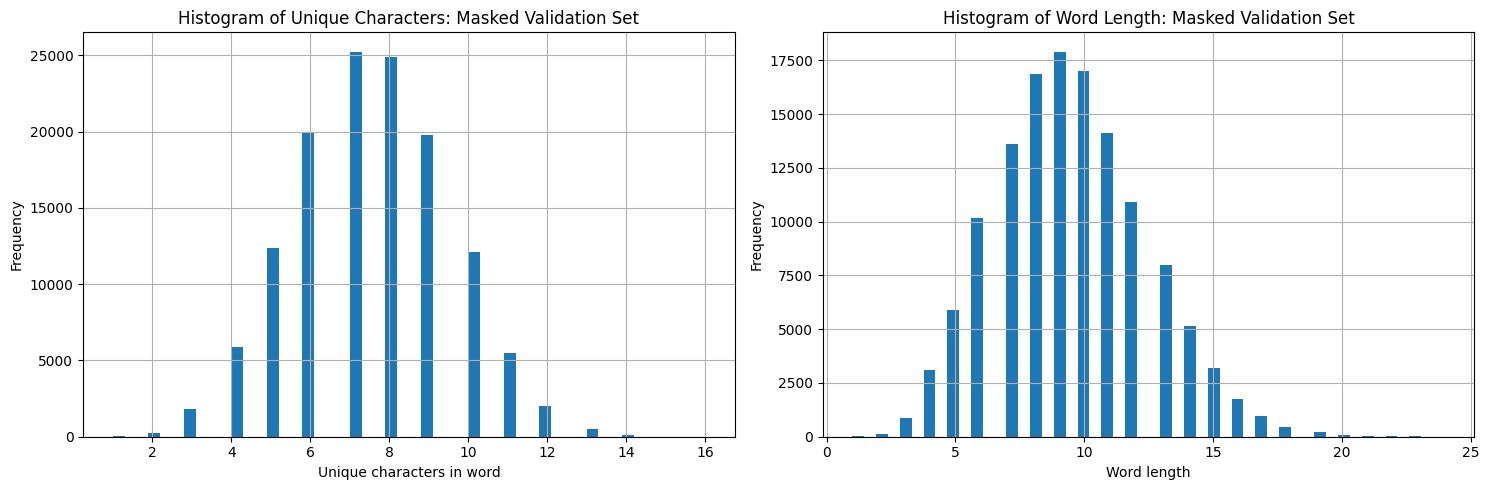

In [11]:
# Plot the distribution of unique characters in the masked validation set
plot_histograms(df_masked_test, title="Masked Validation Set")


In [14]:
# Check how many words from df_masked_val have only one unique character in the column masked_word
print(f"Number of words with only one unique character in the masked word: {len(df_masked_val[df_masked_val['masked_word'].apply(lambda x: len(set(x)) == 1)])}")


Number of words with only one unique character in the masked word: 509


In [19]:
# Save the train dataset to a file
df_train.to_csv('data/to_mask_train.csv', index=False)

In [13]:
# Take only the word, labels and previouys guesses columns and save into a file
df_masked_val[['masked_word', 'labels', 'previous_guesses']].to_csv('data/masked_val.csv', index=False)
df_masked_test[['masked_word', 'labels', 'previous_guesses']].to_csv('data/masked_test.csv', index=False)

In [ ]:
from datasets import load_dataset,Dataset,DatasetDict
from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class HangmanNet(nn.Module):
  def __init__(self,checkpoint, vocab_size = 26, unfreeze_layers = 0): 
    super(HangmanNet,self).__init__() 
    self.num_labels = vocab_size 

    #Load Model with given checkpoint and extract its body
    self.model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    
    # Freeze all layers in the BERT model
    for param in self.model.parameters():
        param.requires_grad = False

    # Unfreeze the last `unfreeze_layers` layers
    if unfreeze_layers > 0:
        for layer in self.model.encoder.layer[-unfreeze_layers:]:
            for param in layer.parameters():
                param.requires_grad = True
        

    self.dropout = nn.Dropout(0.1) 
    self.classifier = nn.Linear(768 + vocab_size,vocab_size) # load and initialize weights
  
  def forward(self, input_ids=None, attention_mask=None, labels=None, prev_guess=None,
              token_type_ids=None):
      outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
      
      sequence_output = outputs.last_hidden_state  # (batch_size, sequence_length, hidden_size)
      sequence_output = self.dropout(sequence_output)

      # Concatenate the previous guesses to the sequence_output
      # (batch_size, sequence_length, hidden_size + vocab_size)
      sequence_output = torch.cat((sequence_output, prev_guess.unsqueeze(1).repeat(1, sequence_output.shape[1], 1)), dim=2)

      logits = self.classifier(sequence_output)  # (batch_size, sequence_length, num_labels)

      loss = None
      if labels is not None:
          loss_fct = nn.CrossEntropyLoss()

          # NOTE: I already has the labels in active logits representation

          # Only keep active parts of the loss
        #   active_loss = labels.view(-1) != -100
          active_logits = logits.view(-1, self.num_labels)
        #   active_labels = torch.where(active_loss, labels.view(-1), torch.tensor(loss_fct.ignore_index).type_as(labels))
          loss = loss_fct(active_logits, labels.view(-1))
        
      return TokenClassifierOutput(logits=logits, loss=loss, hidden_states=outputs.hidden_states,attentions=outputs.attentions)


In [ ]:
# Check the model output
device = "cpu"
checkpoint = "bert-base-uncased"
model = HangmanNet(checkpoint=checkpoint, vocab_size = 26, unfreeze_layers = 1).to(device)

# Prepare a batch using the custom data collator
for batch in train_dataloader:

    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']
    labels = batch['labels']
    prev_guess = batch['prev_guess']

    # Forward pass
    outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels, prev_guess=prev_guess)
    print(outputs.loss)
    print(outputs.logits.shape)

    break


In [ ]:
"""Basic example: getting word embeddings from CharacterBERT"""
from transformers import BertTokenizer
from modeling.character_bert import CharacterBertModel
from utils.character_cnn import CharacterIndexer

# Example text
x = "[CLS] a b a [MASK] d o [MASK] e d [SEP]"

x_bert  = tokenizer(x, truncation=True, padding='max_length', return_tensors="pt", max_length=40)

x = "a b a [MASK] d o [MASK] e d"

# Tokenize the text

x = ['[CLS]', *(x.split()) , '[SEP]']

# Convert token sequence into character indices
indexer = CharacterIndexer()
batch = [x]  # This is a batch with a single token sequence x
batch_ids = indexer.as_padded_tensor(batch)

# Load some pre-trained CharacterBERT
model = CharacterBertModel.from_pretrained(
    './pretrained-models/general_character_bert/')

# Feed batch to CharacterBERT & get the embeddings
embeddings_for_batch, _ = model(batch_ids)
embeddings_for_x = embeddings_for_batch[0]
print('These are the embeddings produces by CharacterBERT (last transformer layer)')
for token, embedding in zip(x, embeddings_for_x):
    print(token, embedding.shape)